In [8]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

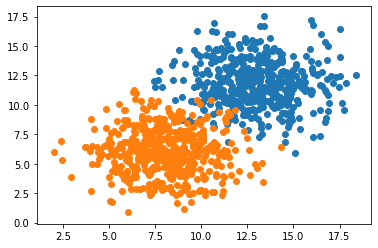

In [3]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [17]:
model = Sequential()
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))
adam = Adam(lr=0.1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(x=X, y=y, verbose=1, batch_size=50, epochs = 150, shuffle='true')

Epoch 1/150
1000/1000 [==============================] - 0s 79us/step - loss: 3.8618 - accuracy: 0.4720
Epoch 2/150
1000/1000 [==============================] - 0s 14us/step - loss: 0.9764 - accuracy: 0.5250
Epoch 3/150
1000/1000 [==============================] - 0s 16us/step - loss: 0.6424 - accuracy: 0.6480
Epoch 4/150
1000/1000 [==============================] - 0s 15us/step - loss: 0.5331 - accuracy: 0.7200
Epoch 5/150
1000/1000 [==============================] - 0s 14us/step - loss: 0.4690 - accuracy: 0.8030
Epoch 6/150
1000/1000 [==============================] - 0s 15us/step - loss: 0.4193 - accuracy: 0.8560
Epoch 7/150
1000/1000 [==============================] - 0s 14us/step - loss: 0.3751 - accuracy: 0.8870
Epoch 8/150
1000/1000 [==============================] - 0s 14us/step - loss: 0.3400 - accuracy: 0.9060
Epoch 9/150
1000/1000 [==============================] - 0s 13us/step - loss: 0.3081 - accuracy: 0.9210
Epoch 10/150
1000/1000 [==============================] - 0s 14u

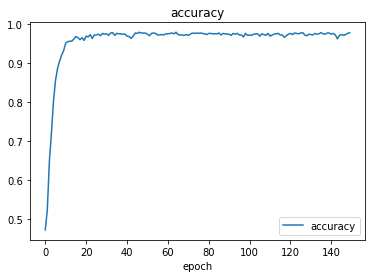

In [18]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

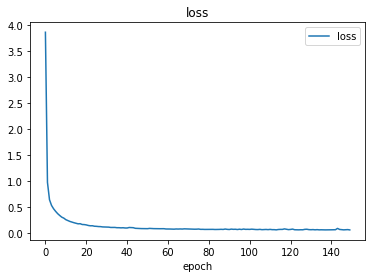

In [19]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [36]:
def plot_decision_boundray(X,y,model):
    x_span = np.linspace(min(X[:,0])-1,max(X[:,0])+1)
    y_span = np.linspace(min(X[:,1])-1,max(X[:,1])+1)
    xx, yy = np.meshgrid(x_span,y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_,yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)

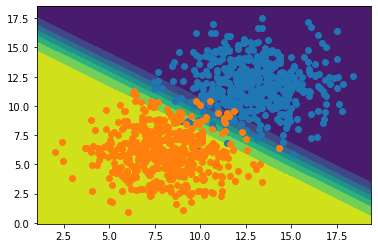

In [38]:
plot_decision_boundray(X,y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

prediction is:  [[0.9998286]]


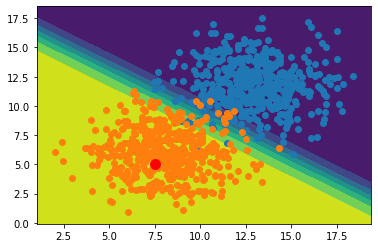

In [45]:
plot_decision_boundray(X,y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 7.5
y = 5
 
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("prediction is: ",prediction)